The aim of this Project is to help you understand the application and implementation of SVMs or SVRs. These techinques come in handy when two clusters have to be separated and then classified. In the following example, we use the Public Earthquake data to Estimate the latitute of the Earthquake by Support Vector Regression.


# Import Libraries 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Import Dataset

In [8]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\CSV Files\oneyear.csv")

In [9]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-02-10T05:12:35.460Z,5.1033,125.3179,44.32,4.3,mb,NaN,131,1.970,0.70,...,2018-02-10T09:03:34.040Z,"36km SSW of Sarangani, Philippines",earthquake,5.0,9.3,0.126,18.0,reviewed,us,us
1,2018-02-10T00:31:19.880Z,-8.8535,117.1527,116.88,4.9,mb,NaN,59,2.991,1.06,...,2018-02-10T03:42:15.567Z,"32km SSW of Batudulang, Indonesia",earthquake,6.5,7.3,0.091,38.0,reviewed,us,us
2,2018-02-08T09:52:47.330Z,4.7512,96.2239,10.00,5.3,mww,NaN,148,0.862,1.29,...,2018-02-09T02:47:40.084Z,"51km S of Reuleuet, Indonesia",earthquake,6.6,1.8,0.073,18.0,reviewed,us,us
3,2018-02-07T22:28:37.900Z,-10.1202,118.7274,10.00,4.5,mb,NaN,86,3.764,0.95,...,2018-02-07T22:54:23.040Z,"61km SW of Panenggoede, Indonesia",earthquake,7.6,1.9,0.084,42.0,reviewed,us,us
4,2018-02-07T20:22:57.530Z,1.4361,127.0142,120.78,4.5,mb,NaN,105,0.748,0.76,...,2018-02-07T21:26:37.040Z,"82km NNW of Kota Ternate, Indonesia",earthquake,8.0,6.6,0.089,37.0,reviewed,us,us


In [10]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1369.000000,1369.000000,1369.000000,1369.000000,0.0,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1368.000000,1368.000000
mean,-1.117302,119.207969,102.069072,4.496275,NaN,100.971512,2.326909,0.852768,8.227684,6.678305,0.121450,30.986111
std,5.605702,10.028394,129.415379,0.377192,NaN,44.781584,2.286374,0.260124,2.622920,3.829167,0.050303,30.446167
min,-11.762200,95.113500,4.000000,3.900000,NaN,13.000000,0.008000,0.130000,2.400000,0.600000,0.034000,1.000000
25%,-7.026200,112.938000,24.610000,4.200000,NaN,71.000000,1.310000,0.670000,6.500000,3.600000,0.085000,13.000000
50%,0.268400,123.957300,53.860000,4.400000,NaN,95.000000,2.063000,0.830000,7.900000,7.000000,0.116000,20.000000
75%,3.541300,126.788100,121.110000,4.600000,NaN,128.000000,2.928000,1.030000,9.500000,8.900000,0.148000,37.000000
max,9.268100,128.317100,621.700000,6.900000,NaN,324.000000,56.265000,1.640000,29.300000,33.700000,0.532000,269.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1369 non-null   object 
 1   latitude         1369 non-null   float64
 2   longitude        1369 non-null   float64
 3   depth            1369 non-null   float64
 4   mag              1369 non-null   float64
 5   magType          1369 non-null   object 
 6   nst              0 non-null      float64
 7   gap              1369 non-null   int64  
 8   dmin             1369 non-null   float64
 9   rms              1369 non-null   float64
 10  net              1369 non-null   object 
 11  id               1369 non-null   object 
 12  updated          1369 non-null   object 
 13  place            1369 non-null   object 
 14  type             1369 non-null   object 
 15  horizontalError  1369 non-null   float64
 16  depthError       1369 non-null   float64
 17  magError      

In [12]:
df.isnull().any()

time               False
latitude           False
longitude          False
depth              False
mag                False
magType            False
nst                 True
gap                False
dmin               False
rms                False
net                False
id                 False
updated            False
place              False
type               False
horizontalError    False
depthError         False
magError            True
magNst              True
status             False
locationSource     False
magSource          False
dtype: bool

In [13]:
df.dropna(how='all',axis=1,inplace=True)

In [14]:

df.head()

,time,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-02-10T05:12:35.460Z,5.1033,125.3179,44.32,4.3,mb,131,1.970,0.70,us,...,2018-02-10T09:03:34.040Z,"36km SSW of Sarangani, Philippines",earthquake,5.0,9.3,0.126,18.0,reviewed,us,us
1,2018-02-10T00:31:19.880Z,-8.8535,117.1527,116.88,4.9,mb,59,2.991,1.06,us,...,2018-02-10T03:42:15.567Z,"32km SSW of Batudulang, Indonesia",earthquake,6.5,7.3,0.091,38.0,reviewed,us,us
2,2018-02-08T09:52:47.330Z,4.7512,96.2239,10.00,5.3,mww,148,0.862,1.29,us,...,2018-02-09T02:47:40.084Z,"51km S of Reuleuet, Indonesia",earthquake,6.6,1.8,0.073,18.0,reviewed,us,us
3,2018-02-07T22:28:37.900Z,-10.1202,118.7274,10.00,4.5,mb,86,3.764,0.95,us,...,2018-02-07T22:54:23.040Z,"61km SW of Panenggoede, Indonesia",earthquake,7.6,1.9,0.084,42.0,reviewed,us,us
4,2018-02-07T20:22:57.530Z,1.4361,127.0142,120.78,4.5,mb,105,0.748,0.76,us,...,2018-02-07T21:26:37.040Z,"82km NNW of Kota Ternate, Indonesia",earthquake,8.0,6.6,0.089,37.0,reviewed,us,us


# Visualise The Dataset and Check The Correlation between them

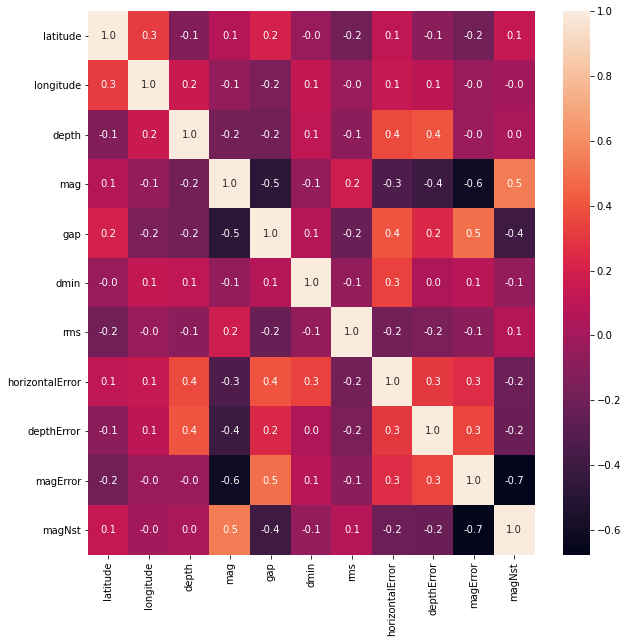

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f',color='green')
plt.show()

# Conclusion
1.  We can see more the dark color indicate less the correlation between features in the dataset 
so we can observe that there is negligible relationship between features as it shows more dark colors

## Let Observe it Through the proper graphical Distribution

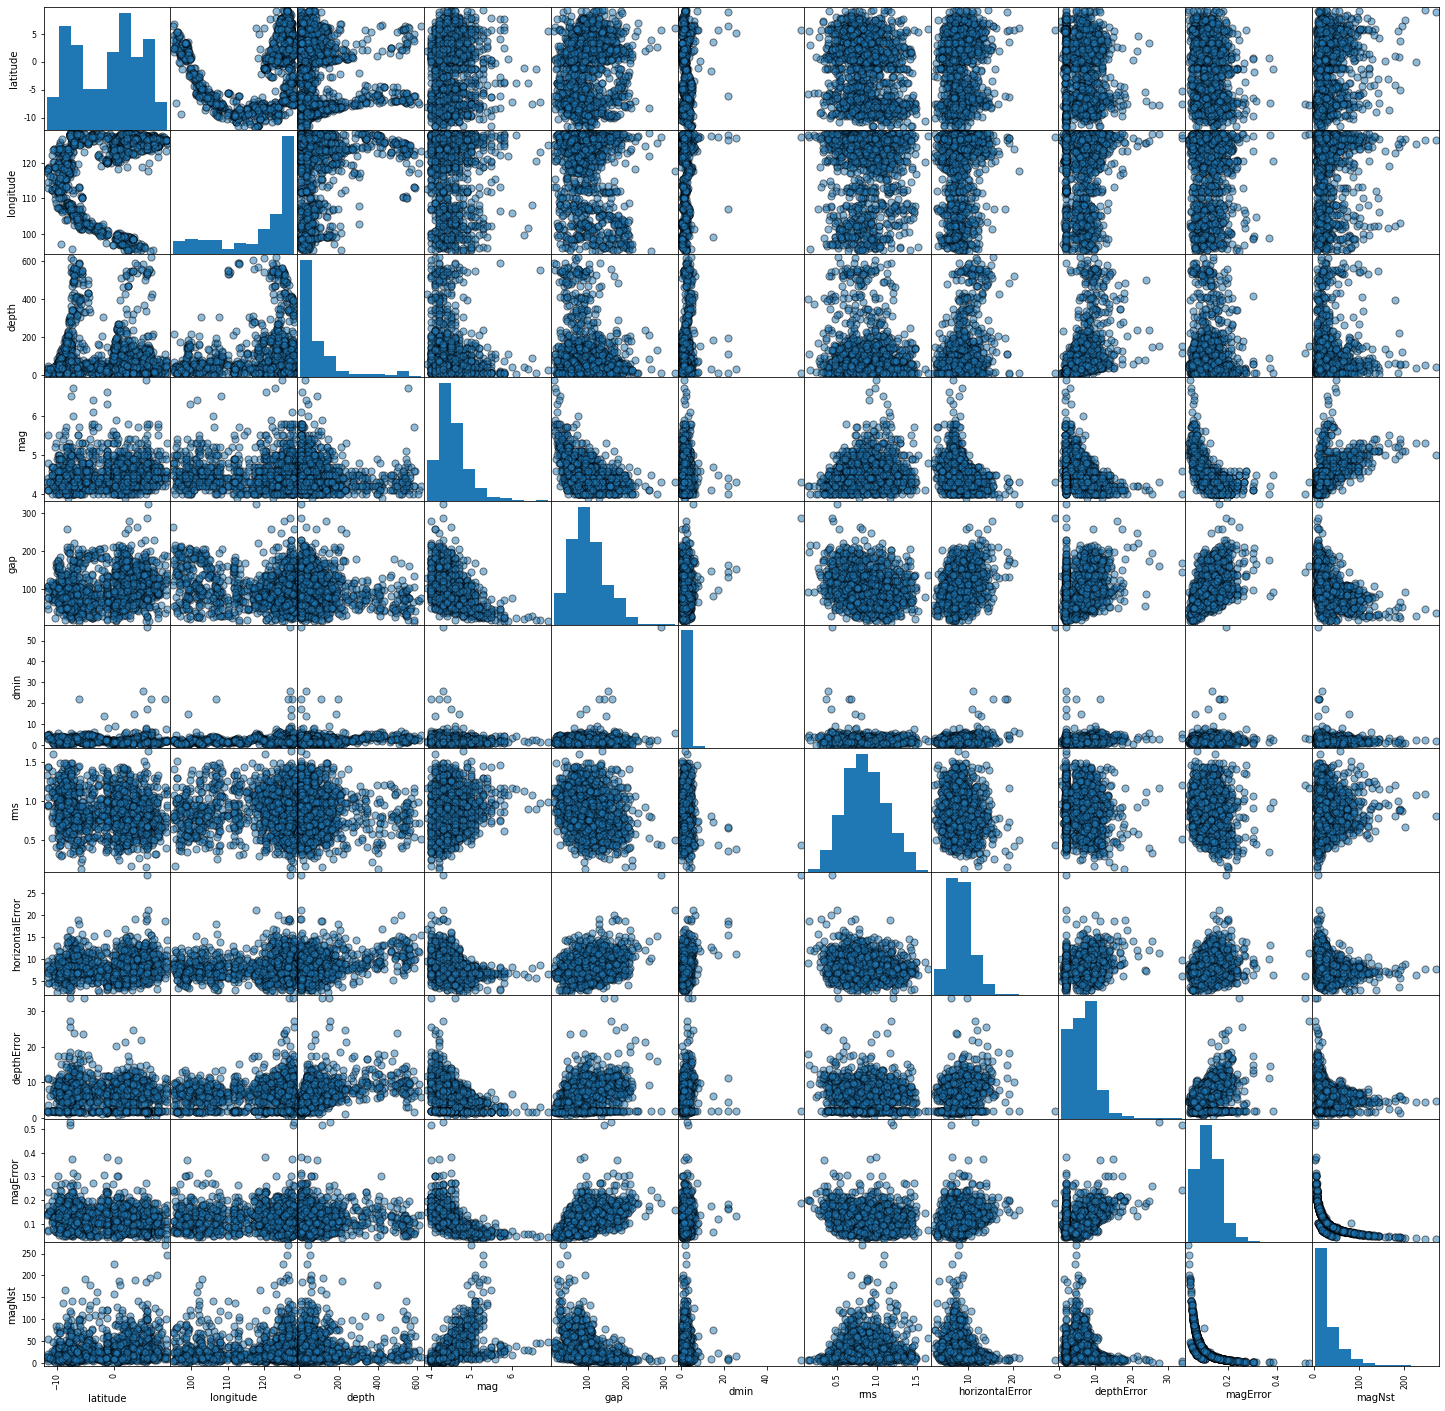

In [27]:
pd.plotting.scatter_matrix(df.loc[0:,df.columns],alpha=0.5,figsize=[25,25],diagonal='hist',s=200,marker='.',edgecolor='black')
plt.show()

In [15]:
#The following is pretty clear from the plots. The diagram between magError and magNst suggests that the equation is hyperbolic
#While graphs between the latitude and longitude is a parabola.
#We Can use this for classification
X =df[['latitude','longitude']]
Y = [0 if elem<4.5 else 1 for elem in df.mag]

In [16]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'gap',
       'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [97]:
dfinal=df[['depth','mag','gap','dmin', 'rms','horizontalError', 'depthError','latitude']]

In [98]:
dfinal

,depth,mag,gap,dmin,rms,horizontalError,depthError,latitude
0,44.32,4.3,131,1.970,0.70,5.0,9.3,5.1033
1,116.88,4.9,59,2.991,1.06,6.5,7.3,-8.8535
2,10.00,5.3,148,0.862,1.29,6.6,1.8,4.7512
3,10.00,4.5,86,3.764,0.95,7.6,1.9,-10.1202
4,120.78,4.5,105,0.748,0.76,8.0,6.6,1.4361
...,...,...,...,...,...,...,...,...
1364,47.42,4.3,113,1.525,0.68,9.9,7.9,2.2514
1365,32.76,4.3,121,3.355,1.25,7.7,6.1,-11.1391
1366,164.67,4.3,102,1.713,0.64,5.8,7.7,-2.8106
1367,181.63,4.5,76,0.563,1.25,8.0,5.9,-8.4613


Let __depth__ be the Response and other variables in __dfinal__ are independent variables

# Segregate the Dependent and Independent variables

In [99]:
X=dfinal.iloc[:,:-1]
Y=dfinal.iloc[:,-1] #latitute of the earthquake

# Train Test split

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


# Trainning the Model

In [101]:
from sklearn.svm import SVR

In [102]:
model=SVR(kernel='linear')

In [103]:
model.fit(X_train,y_train)

SVR(kernel='linear')

# Prediction on Test data

In [104]:
y_pred=model.predict(X_test)

In [105]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
438,2.1471,3.193851
2,4.7512,3.019946
1307,5.2456,-1.475365
1221,-6.2109,4.889924
1228,-8.4529,1.932165
...,...,...
232,-1.2116,0.647688
90,1.9603,0.568930
482,7.4790,-0.896117
921,-5.0902,0.891974


# model validation

In [106]:
from sklearn import metrics
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error : 4.635839559598087


In [107]:
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(X_train,y_train)

LinearRegression()

In [108]:
y_=mod.predict(X_test)

In [109]:
from sklearn import metrics
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test,y_))

Mean Absolute Error : 4.746222141229532


In [118]:
l1=['rbf','sigmoid','poly','linear']

for i in l1:
    model=SVR(kernel=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(mean_absolute_error(y_test,y_pred))
   
    
    

4.680038779628007
18.785407198207487
4.931835148411835
4.635839559598087
